<a href="https://colab.research.google.com/github/chuk-yong/Daily-Coding-Problem/blob/main/10_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graphs

A graph is defined by a VERTICES connected by EDGES

Vertices are like nodes while edges are descibed by 'connection'

Bettery explaination: https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/

https://python-course.eu/applications-python/graphs-python.php


    

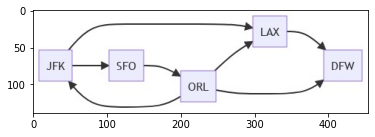

In [2]:
import base64
import requests, io
from PIL import Image
import matplotlib.pyplot as plt

graph = """
graph LR;
    LAX--> DFW;
    JFK--> LAX & SFO;
    ORL--> JFK & LAX & DFW;
    SFO--> ORL;
"""

graphbytes = graph.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
plt.imshow(img)

A dictionary is used to show each mapping:
```
airport = {
  'JFK':['SFO', 'LAX'],
  'SFO':['ORL'],
  'ORL':['JFK', 'LAX', 'DFW'],
  'LAX':['DFW']
}
```

Or use a dictionary with a set to avoid repetition:

```
graph = { "a" : {"c"},
          "b" : {"c", "e"},
          "c" : {"a", "b", "d", "e"},
          "d" : {"c"},
          "e" : {"c", "b"},
          "f" : {}
        }
```

Or use a matrix:

```
indices = {
  'JFK':0,
  'SFO':1,
  'ORL':2,
  'LAX':3,
  'DFW':4
}

graph = [
  [0, 1, 0, 1, 0],
  [0, 0, 1, 0, 0],
  [1, 0, 0, 1, 1],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0]
]
```

Matrix has faster lookup time to check if a given edge exists but uses more space.

# Traversal Method

DFS - Depth-First Search.  This is a stack and uses recursion.

BFS - Breath-First Search.  This is a queue and appends neighbours to end of queue.



In [4]:
# DFS
def DFS(graph, start, visited=set()):
  visited.add(start)
  for neighbor in graph[start]:
    if neighbor not in visited:
      DFS(graph, neighbor, visited)

  return visited

# BFS
from collections import deque

def BFS(graph, start, visited={}):
  queue = deque([start])

  while queue:
    vertex = queue.popleft()
    visited.add(vertex)
    for neighbor in graph[vertex]:
      if neighbor not in visited:
        queue.append(neighbor)

  return visited


## Using Networkx

Tutorial: https://networkx.org/documentation/stable/tutorial.html

Plotting: https://networkx.org/documentation/latest/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py

In [25]:
# Using Networkx
import networkx as nx
G = nx.Graph()
airport = {
  'JFK':{'SFO', 'LAX'},
  'SFO':{'ORL'},
  'ORL':{'JFK', 'LAX', 'DFW'},
  'LAX':{'DFW'}
}
for node in airport:
  G.add_node(node)
  for edges in airport[node]:
    G.add_edge(node,edges)

print(list(G.nodes()))
print(list(G.edges()))

['JFK', 'SFO', 'LAX', 'ORL', 'DFW']
[('JFK', 'SFO'), ('JFK', 'LAX'), ('JFK', 'ORL'), ('SFO', 'ORL'), ('LAX', 'ORL'), ('LAX', 'DFW'), ('ORL', 'DFW')]


<function matplotlib.pyplot.show>

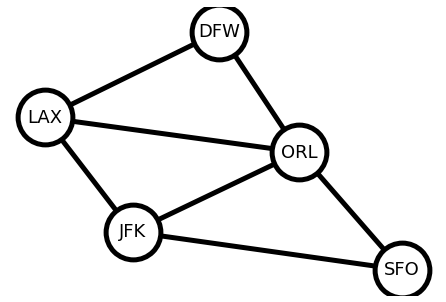

In [42]:
import matplotlib.pyplot as plt
options = {
    "font_size": 18,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
# ?? why the position are so weird??
#pos = {'JFK': (0, 0), 'LAX': (-1, 0.3), 'DFW': (2, 0.17), 'ORL': (4, 0.255), 'SFO': (5, 0.03)}
pos = {'JFK': (0, 0), 'LAX': (-2, 4), 'DFW': (4, 4), 'ORL': (2, 2), 'SFO': (-2,0)}
#pos = nx.spiral_layout(G)
nx.draw(G,with_labels=True, **options)
plt.show